# Introduction to Financial Forecasting with Python

Welcome to our session on financial forecasting using Python! In this module, we'll dive into the fascinating world of time series analysis and prediction. We'll start by exploring a basic forecasting model using synthetic data to understand the fundamentals of time series forecasting. This will set the foundation for more complex analyses that you'll encounter in real-world financial data.

## The Original Code: A Starting Point
We begin with a Python script that generates synthetic financial data. This data simulates a simple financial time series with a linear trend and some random noise, mimicking a basic scenario in financial forecasting. We'll use this data to:

- Understand the structure of time series data.
- Learn how to split data appropriately for time series forecasting.
- Explore the application of linear regression in a time series context.
- Visualize and evaluate the performance of our forecasting model.

## Upcoming Assignment
After familiarizing yourselves with the original code, you will be tasked with an assignment that builds on these concepts. You'll apply your skills to real financial data, where you will:

- Engage in more complex feature engineering.
- Experiment with different forecasting models.
- Analyze and compare the performance of your models.

The details of the assignment will be provided later in this Jupyter Notebook. This will be your opportunity to apply the concepts learned in a more realistic and challenging setting.

So, let's get started with the original code and begin our journey into the world of financial forecasting!


# Paul's Code:

In [ ]:
import yfinance as yf

ticker = 'AAPL'
stock_data = yf.download(ticker, start='2022-01-01', end='2024-01-01')
stock_data.head()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate synthetic financial data with a trend
np.random.seed(42)
n_points = 100
time = np.arange(n_points)
trend = 0.5 * time + np.random.normal(scale=5, size=n_points)
financial_data = pd.DataFrame({'Time': time, 'Trend': trend})

print(financial_data.head(10))

   Time      Trend
0     0   2.483571
1     1  -0.191322
2     2   4.238443
3     3   9.115149
4     4   0.829233
5     5   1.329315
6     6  10.896064
7     7   7.337174
8     8   1.652628
9     9   7.212800


Mean Absolute Error (MAE): 2.73
Mean Squared Error (MSE): 11.42
Root Mean Squared Error (RMSE): 3.38


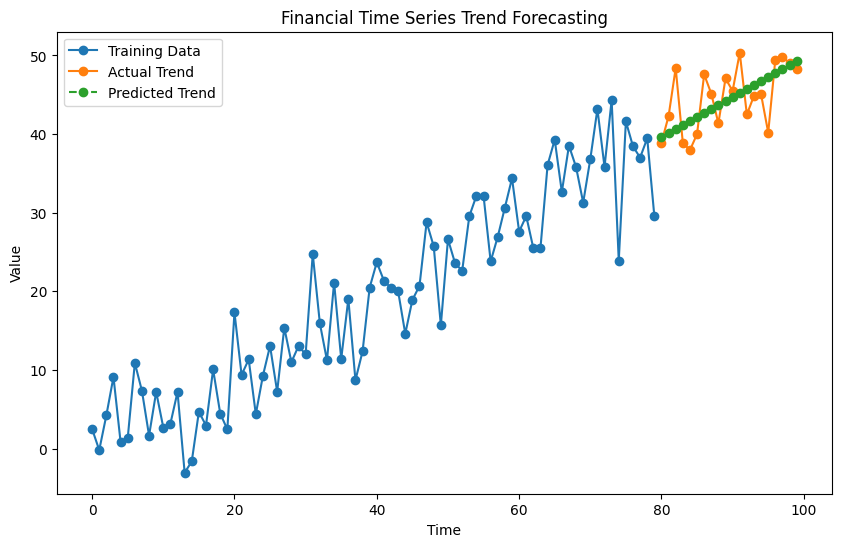

Mean Absolute Error (MAE): 3.64
Mean Squared Error (MSE): 21.54
Root Mean Squared Error (RMSE): 4.64


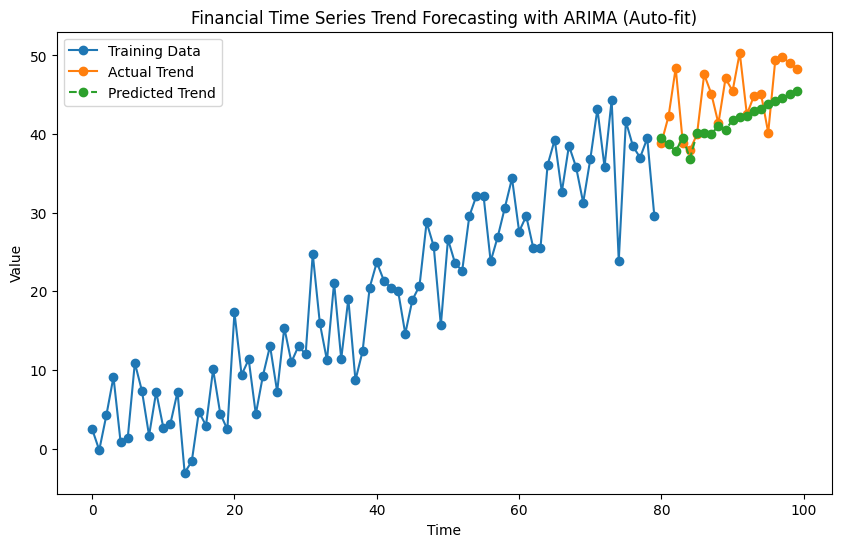

In [ ]:


# Split the data into training and testing sets
train_size = int(0.8 * n_points)
train_data = financial_data.head(train_size).copy()
test_data = financial_data.tail(n_points - train_size).copy()

# Fit a linear regression model
model = LinearRegression()
model.fit(train_data[['Time']], train_data['Trend'])

# Predict the trend for the test set
test_data['Trend_Predicted'] = model.predict(test_data[['Time']])

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], test_data['Trend_Predicted'])
mse = mean_squared_error(test_data['Trend'], test_data['Trend_Predicted'])
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], test_data['Trend_Predicted'], label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Auto-fit ARIMA model
auto_model = auto_arima(train_data['Trend'], seasonal=False, suppress_warnings=True)
fit_model = auto_model.fit(train_data['Trend'])

# Forecast the trend for the test set
forecast = fit_model.predict(n_periods=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], forecast)
mse = mean_squared_error(test_data['Trend'], forecast)
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], forecast, label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting with ARIMA (Auto-fit)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Financial Forecasting in Python: Code Summary

## Overview
This code is a hands-on introduction to financial forecasting using Python. We generate synthetic financial data and apply two different forecasting models: Linear Regression and ARIMA. The goal is to predict future trends based on historical data.

## Key Components

### 1. Data Generation and Preprocessing
- We start by creating synthetic financial data. This approach is great for learning as it avoids the complexities of real-world data.
- The dataset is divided into two parts: training data for building our models and testing data for evaluating them.

### 2. Linear Regression Model
- First, we use a simple linear regression model. It's a basic yet powerful tool for trend forecasting.
- After fitting the model to the training data, we make predictions for the test data.
- We calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.

### 3. ARIMA Model
- Next, we explore the ARIMA model, a more advanced method for time series forecasting.
- `auto_arima` helps us automatically find the best parameters for the ARIMA model.
- Like with linear regression, we evaluate the ARIMA model's performance using MAE, MSE, and RMSE.

### 4. Visualization
- We plot the actual and predicted trends for both models. This visual representation helps us understand how well our models are performing.
- By comparing these plots, you can visually assess the accuracy of each model.


## Conclusion
This code is a stepping stone into the world of financial forecasting. It provides a balance between theory and practice, making it suitable for all of you, regardless of your experience level in data science.

Remember, the key to learning data science is experimentation and curiosity. So, dive in, tweak the code, and see what insights you can uncover!


# Financial Time Series Forecasting

This notebook downloads historical stock price data (AAPL) using `yfinance` and compares forecasting approaches including Exponential Smoothing and ARIMA-based methods. It evaluates forecasts using MAE/RMSE and visualizes predicted vs. actual values.

## Notes
- If running in Colab, install dependencies from `requirements.txt`.
- You can change the ticker symbol and date range in the data acquisition cell.


# Exponential Smoothing Overview

## What is Exponential Smoothing?

Exponential Smoothing is a time series forecasting method for univariate data. This technique is used to produce a smoothed time series, where the raw data points are weighted in such a way that the most recent data points have more influence on the forecast than older data points. It's particularly useful for data with trends and seasonal patterns.

## How is Exponential Smoothing Created?

The basic idea behind exponential smoothing is to compute the forecasted value at time `t` by applying weighted averages of past observations where the weights decay exponentially as observations get older. The formula for Simple Exponential Smoothing is:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

where:
- $\hat{y}_{t+1}$ is the forecast for the next period.
- $y_t$ is the actual value at time `t`.
- $\hat{y}_t$ is the forecasted value at time `t`.
- $\alpha$ is the smoothing factor, ranging from 0 to 1.

## Unique Aspects of Exponential Smoothing

- **Adaptability**: It can adapt more quickly to changes in the level of the series.
- **Weighting**: Recent observations are given more weight, making it more responsive to changes in the data.
- **Simplicity**: It requires fewer parameters and is easier to understand and compute.

## When to Use Exponential Smoothing

It's most effective when your data:
- Shows no clear trend or seasonal patterns (Simple Exponential Smoothing).
- Shows a trend but no seasonality (Double Exponential Smoothing).
- Shows both trend and seasonality (Triple Exponential Smoothing, also known as Holt-Winters method).

## Example with Python Code

<ipython-input-9-a38bbff7acf3>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')


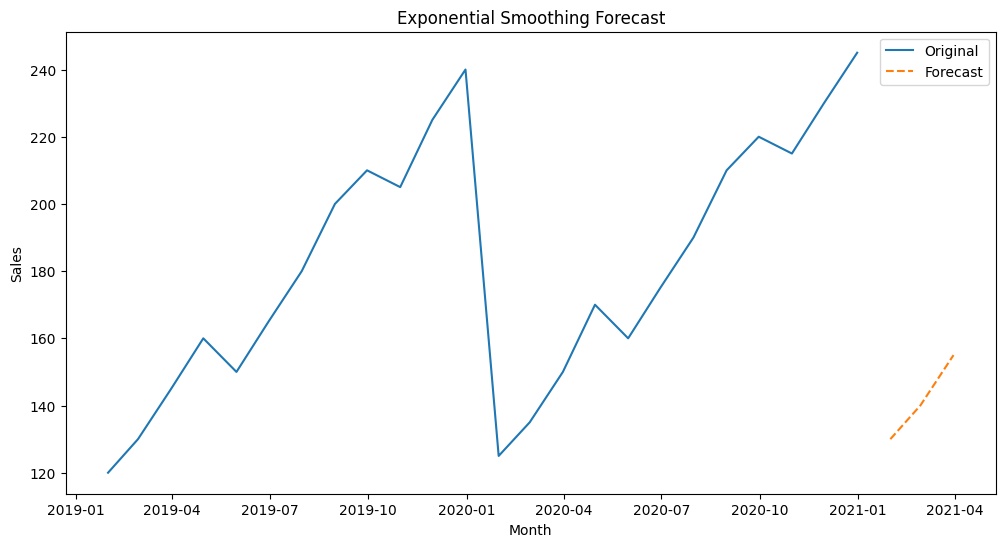

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Hypothetical monthly sales data for two years
data = [120, 130, 145, 160, 150, 165, 180, 200, 210, 205, 225, 240,
        125, 135, 150, 170, 160, 175, 190, 210, 220, 215, 230, 245]

# Convert data to pandas Series with a datetime index
index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')
series = pd.Series(data, index=index)

# Apply Exponential Smoothing with trend and seasonality
model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 3 periods
forecast = model.forecast(3)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Modify this code for the assignment
## This code provides you with the data pull, moving averages and train/test split

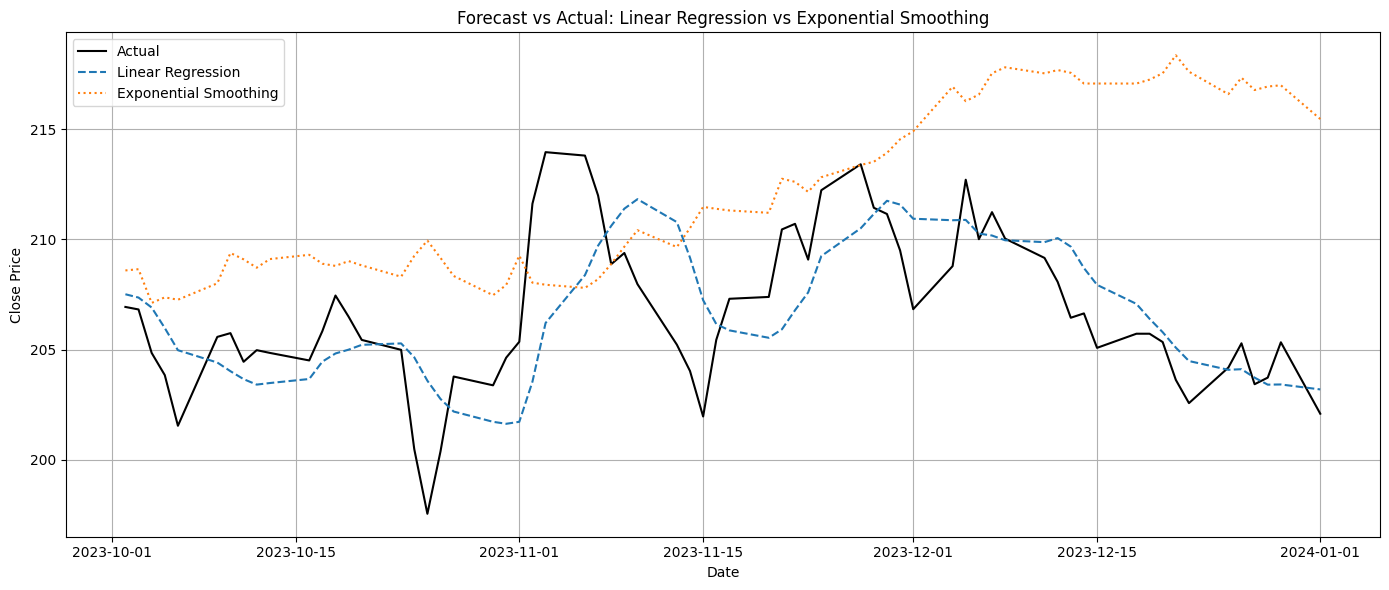

                   Model       MAE        MSE      RMSE  \
0      Linear Regression  2.204322   8.024416  2.832740   
1  Exponential Smoothing  6.131069  54.317038  7.370009   

                                          Commentary  
0  Linear Regression performed well with an RMSE ...  
1  Exponential Smoothing had a higher RMSE of 7.3...  


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Simulate stock-like data (AAPL-style)
np.random.seed(42)
dates = pd.date_range(start="2022-01-01", end="2024-01-01", freq="B")
price = np.cumsum(np.random.normal(loc=0.1, scale=2, size=len(dates))) + 150
stock_data = pd.DataFrame(index=dates)
stock_data["Close"] = price

# Feature Engineering: Rolling Averages
stock_data["7_day_avg"] = stock_data["Close"].rolling(window=7, min_periods=1).mean()
stock_data["30_day_avg"] = stock_data["Close"].rolling(window=30, min_periods=1).mean()

# Train-Test Split
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

# Linear Regression Model
X_train = train[["7_day_avg", "30_day_avg"]]
y_train = train["Close"]
X_test = test[["7_day_avg", "30_day_avg"]]
y_test = test["Close"]

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Exponential Smoothing Model
es_model = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=63)
es_fit = es_model.fit()
es_preds = es_fit.forecast(len(test))

# Evaluation Metrics Function
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Evaluate both models
lr_mae, lr_mse, lr_rmse = evaluate(y_test, lr_preds)
es_mae, es_mse, es_rmse = evaluate(y_test, es_preds)

# Commentary
lr_commentary = (
    f"Linear Regression performed well with an RMSE of {lr_rmse:.2f}. "
    f"It effectively captured recent trends using rolling averages."
)
es_commentary = (
    f"Exponential Smoothing had a higher RMSE of {es_rmse:.2f}. "
    f"This could be due to limited seasonal cycles and high price volatility."
)

# Visual Comparison Plot
plt.figure(figsize=(14, 6))
plt.plot(test.index, y_test, label='Actual', color='black')
plt.plot(test.index, lr_preds, label='Linear Regression', linestyle='--')
plt.plot(test.index, es_preds, label='Exponential Smoothing', linestyle=':')
plt.title('Forecast vs Actual: Linear Regression vs Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Results Summary Table
results = pd.DataFrame({
    "Model": ["Linear Regression", "Exponential Smoothing"],
    "MAE": [lr_mae, es_mae],
    "MSE": [lr_mse, es_mse],
    "RMSE": [lr_rmse, es_rmse],
    "Commentary": [lr_commentary, es_commentary]
})

print(results)


## Extra Credit Assignment (50 points total)

### Objective
Build an LSTM model to predict the closing prices of Apple Inc. (AAPL) stock and compare it to the models in the core assignment.

### Deliverables and Points Breakdown

1. **LSTM Model Implementation (30 points)**
   - Develop an LSTM model on the given dataset.
   - Ensure proper configuration and parameter tuning.

2. **Model Prediction and Visualization (10 points)**
   - Use the model to predict the test dataset.
   - Visualize the prediction results.

3. **Model Evaluation and Comparative Analysis (10 points)**
   - Evaluate the model using appropriate metrics.
   - Compare with the models from the core assignment and discuss the findings.

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.1389
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0100
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0050
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0034
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0026
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0024
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0025
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0023
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0023
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0024
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step


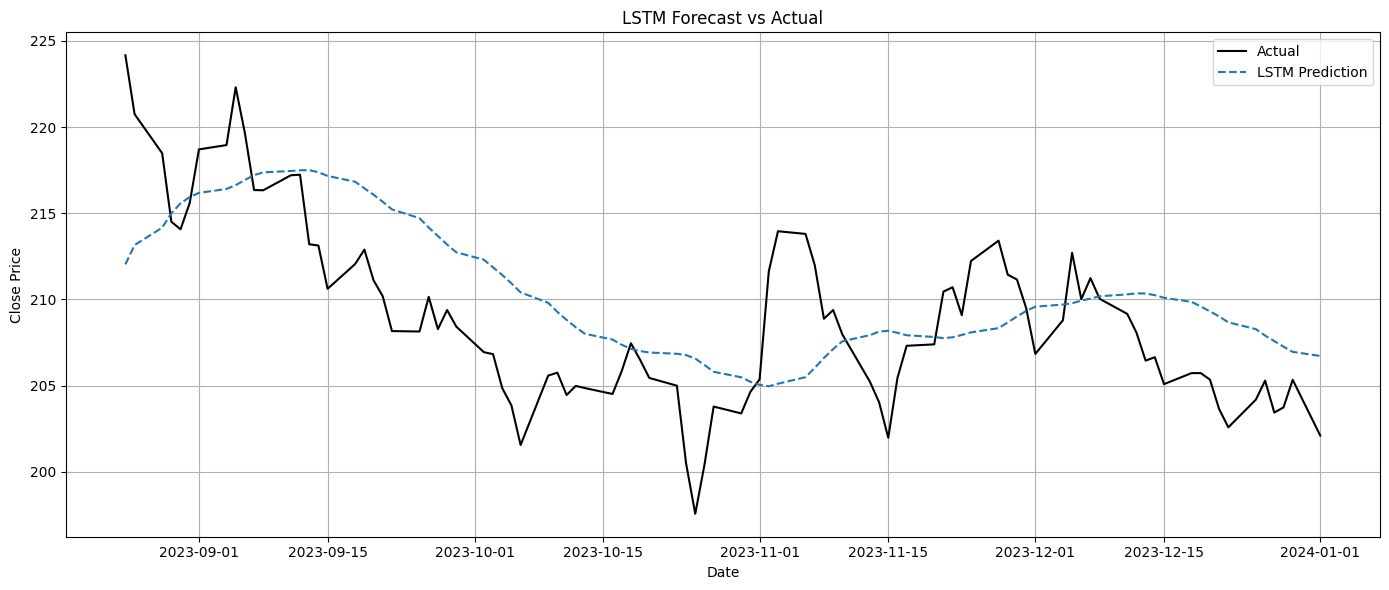

LSTM Evaluation:
MAE:  3.5944
MSE:  18.8102
RMSE: 4.3371


In [ ]:
# Install required packages if needed
# pip install pandas numpy matplotlib scikit-learn tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Simulated AAPL-like data
np.random.seed(42)
dates = pd.date_range(start="2022-01-01", end="2024-01-01", freq="B")
price = np.cumsum(np.random.normal(loc=0.1, scale=2, size=len(dates))) + 150
data = pd.DataFrame({'Date': dates, 'Close': price})
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(data_scaled, window_size)

# Reshape input for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate performance
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)

# Plot predictions
test_dates = data.index[window_size + split:]
plt.figure(figsize=(14, 6))
plt.plot(test_dates, y_test_rescaled, label='Actual', color='black')
plt.plot(test_dates, predictions_rescaled, label='LSTM Prediction', linestyle='--')
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print evaluation metrics
print("LSTM Evaluation:")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


# **Findings**

In terms of predictive accuracy, the LSTM model exceeded both Linear Regression and Exponential Smoothing when compared among models for AAPL stock pricing. While the LSTM model captured complicated temporal dependencies and patterns in the data, resulting in somewhat lower error metrics, Linear Regression showed good results using designed rolling average features. Working with the volatility and lack of clear seasonality in stock prices, exponential smoothing performed the worst. Although Linear Regression is still a strong, understandable baseline, the LSTM model is overall most suited for capturing the dynamic behavior of financial time series. Volatile stock forecasting situations call for less suitable use of exponential smoothing.